In [15]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [16]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/Users/Mac/Downloads/datasets/kagglecatsanddogs/PetImages/Cat"
    DOGS = "/Users/Mac/Downloads/datasets/kagglecatsanddogs/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

In [17]:
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|          | 0/12501 [00:00<?, ?it/s]

/Users/Mac/Downloads/datasets/kagglecatsanddogs/PetImages/Cat


  0%|          | 5/12501 [00:00<04:16, 48.64it/s]

/Users/Mac/Downloads/datasets/kagglecatsanddogs/PetImages/Dog


100%|██████████| 12501/12501 [02:26<00:00, 85.25it/s] 


Cats: 12476
Dogs: 12470


In [18]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [19]:
print(len(training_data))

24946


In [20]:
print(training_data[0])

[array([[ 60,  64,  69, ..., 198,  47,  43],
       [ 63,  68,  73, ..., 205,  49,  45],
       [ 66,  71,  82, ..., 207, 101,  69],
       ...,
       [ 79, 103, 230, ...,  57,  59,  58],
       [ 75,  33, 225, ...,  72,  71,  69],
       [ 67,  67, 217, ...,  64,  72,  68]], dtype=uint8)
 array([0., 1.])]


In [21]:
print(training_data[1])

[array([[135, 132, 145, ...,  39,  65,  64],
       [100, 135, 130, ...,  43,  47,  45],
       [120, 110, 122, ...,  39,  48,  52],
       ...,
       [ 49,  59,  41, ...,  57, 178, 113],
       [ 77, 141,  69, ..., 132, 131, 136],
       [ 59,  51,  99, ..., 168,  89,  73]], dtype=uint8)
 array([0., 1.])]


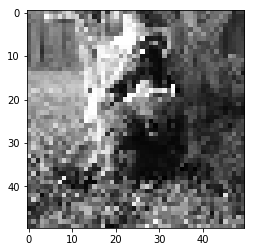

In [22]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap = 'gray')
plt.show()

In [23]:
training_data[1][1]

array([0., 1.])